In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

In [2]:
image_path = 'data/original/1.pgm'
image_groundtruth_path = 'data/groundtruth/1_gt.pgm'

In [3]:
image = plt.imread(image_path)
image_groundtruth = plt.imread(image_groundtruth_path)

In [4]:
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

## Pre procesamiento

## Niblack

In [5]:
def niblack_thresholding(image, window_size=15, k=-0.2):
    x, y = image.shape
    threshold = np.zeros((x, y), dtype=np.uint8)
    
    for i in range(x):
        for j in range(y):
            x1 = max(0, i - window_size // 2)
            x2 = min(x, i + window_size // 2)
            y1 = max(0, j - window_size // 2)
            y2 = min(y, j + window_size // 2)
            
            window = image[x1:x2, y1:y2]
            mean = np.mean(window)
            std = np.std(window)
            
            threshold[i, j] = mean - k * std
            
    return threshold

In [6]:
threshold = niblack_thresholding(image, window_size=21, k=0.2)
binary = image < threshold

## Post procesamiento

## Resultados 

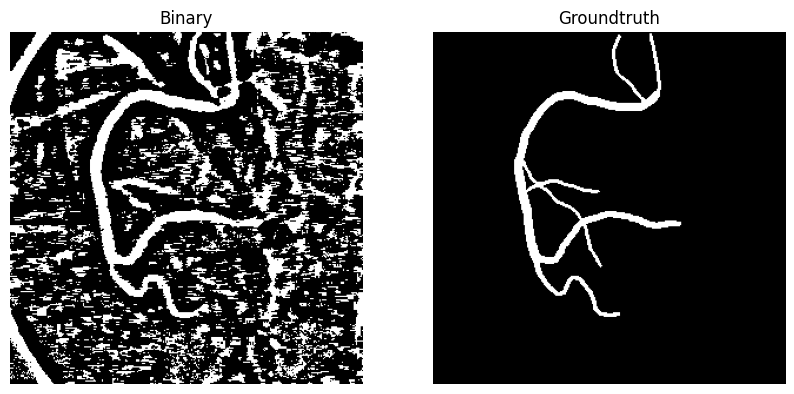

In [7]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title('Binary')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_groundtruth, cmap='gray')
plt.title('Groundtruth')
plt.axis('off')

plt.show()

## Métricas